## Inital exploration of data

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.animation import FuncAnimation
import numpy as np

# Load your dataset
ds = xr.open_dataset("hycom2016/010_archv_2016_001_00_2d.nc")
print(ds)

<xarray.Dataset> Size: 78MB
Dimensions:                (MT: 1, Latitude: 1537, Longitude: 2101)
Coordinates:
    Date                   (MT) float64 8B ...
  * Latitude               (Latitude) float32 6kB 18.09 18.1 ... 31.95 31.96
  * Longitude              (Longitude) float32 8kB -98.0 -97.99 ... -77.01 -77.0
  * MT                     (MT) datetime64[ns] 8B 2016-01-01
Data variables:
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 13MB ...
    ssh                    (MT, Latitude, Longitude) float32 13MB ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 13MB ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 13MB ...
    wnd_ewd                (MT, Latitude, Longitude) float32 13MB ...
    wnd_nwd                (MT, Latitude, Longitude) float32 13MB ...
Attributes:
    Conventions:                CF-1.6
    title:                      HYCOM
    source:                     HYCOM archive file
    experiment:                 01.0
    comment:

In [3]:
u=ds['u_barotropic_velocity']
print(u)

<xarray.DataArray 'u_barotropic_velocity' (MT: 1, Latitude: 1537,
                                           Longitude: 2101)> Size: 13MB
[3229237 values with dtype=float32]
Coordinates:
    Date       (MT) float64 8B ...
  * Latitude   (Latitude) float32 6kB 18.09 18.1 18.11 ... 31.94 31.95 31.96
  * Longitude  (Longitude) float32 8kB -98.0 -97.99 -97.98 ... -77.01 -77.0
  * MT         (MT) datetime64[ns] 8B 2016-01-01
Attributes:
    standard_name:  barotropic_eastward_sea_water_velocity
    units:          m/s
    valid_range:    [-1.2002983  1.37218  ]
    long_name:          baro. u-vel.   [01.0H]


### Thoughts
1. we want to isolate a slice of current data based on the ingestion information present form [this paper](https://www.frontiersin.org/journals/marine-science/articles/10.3389/fmars.2020.00693/full). Ideally the area should spread onto the ocean. 

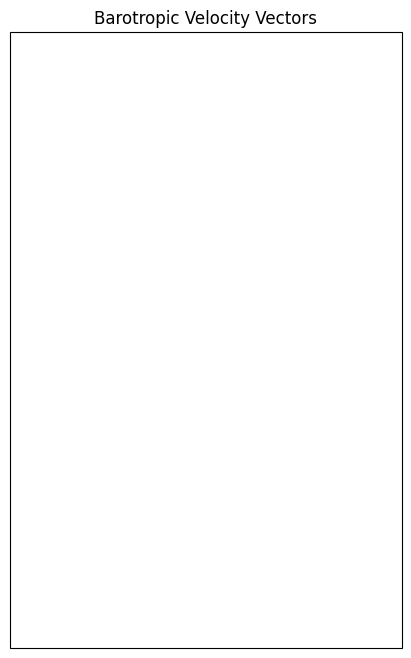

In [ ]:
uspec = u.sel(Latitude=slice(18.2, 19.0), Longitude=slice(-98.0, -97.5))
vspec = ds['v_barotropic_velocity'].sel(Latitude=slice(18.2, 19.0), Longitude=slice(-98.0, -97.5))

lat = uspec['Latitude'].values
lon = uspec['Longitude'].values

# Create 2D meshgrid (as required by quiver)
lon2d, lat2d = np.meshgrid(lon, lat)

# Extract the velocity components at the first time index
u_data = uspec.isel(MT=0).values
v_data = vspec.isel(MT=0).values

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# Initialize quiver plot
quiver = ax.quiver(lon2d, lat2d, u_data, v_data, scale=50)

# Animation function
def animate(i):
    quiver.set_UVC(u_[i], v_[i])
    ax.set_title(f"Surface Currents | Time index: {i}")
    return quiver,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(u_['MT']), interval=500)

# Show the animation
plt.show()


